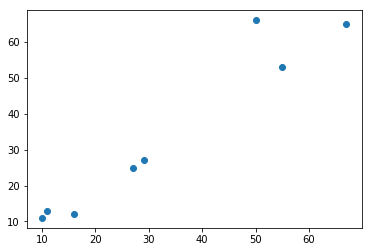

[[10 11]
 [50 66]
 [11 13]
 [27 25]
 [16 12]
 [29 27]
 [55 53]
 [67 65]]
Centroids :  [[57.33333333 61.33333333]
 [12.33333333 12.        ]
 [28.         26.        ]]
Targets or labels :  [1 0 1 2 1 2 0 0]
[[57.33333333 61.33333333]
 [12.33333333 12.        ]
 [28.         26.        ]]
(3, 2)
[57.33333333 12.33333333 28.        ]
[61.33333333 12.         26.        ]


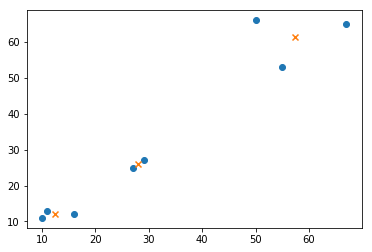

In [41]:
#SIMPLEST kmeans

import matplotlib.pyplot as plt
x=[10,50,11,27,16,29,55,67]
y=[11,66,13,25,12,27,53,65]
plt.scatter(x,y)
plt.show()
import numpy as np
data=np.column_stack((x,y)) #produces a stack columnwise
print(data)
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3) #seperate data in 3 cluster
model.fit(data)  #we are fitting our data inside a model
model.predict(data)
#model.fit_predict(data) #combining above two steps in one step

#Locations of the means geerated by the KMeans
centroids=model.cluster_centers_
print("Centroids : ",centroids)
targets=model.labels_
print("Targets or labels : ",targets)
print(centroids)
print(centroids.shape)
print(centroids[:,0])
print(centroids[:,1])
plt.scatter(x,y)
plt.scatter(x=centroids[:,0],y=centroids[:,1],marker='x')
plt.show()

{1: [48, 74], 2: [16, 25], 3: [58, 26]}


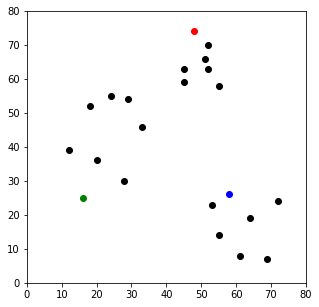

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.DataFrame({
'x':[12,20,28,18,29,33,24,45,45,52,51,52,55,53,55,61,64,69,72],
'y':[39,36,30,52,54,46,55,59,63,70,66,63,58,23,14,8,19,7,24]
})
np.random.seed(13) #in seed random value comes different when run again
k=3
# centroids[i]=[x,y]
centroids={
    i+1:[np.random.randint(0,80),np.random.randint(0,80)]
    for i in range(k)
}
print(centroids)
fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color='k')
colormap={1:'r',2:'g',3:'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colormap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

In [92]:

def assignment(df,centroids):
    for i in centroids.keys():
        # sqrt((x1-x2)^2-(y1-y2)^2)
        df['distance_from_{}'.format(i)]=(
           np.sqrt(
              (df['x']-centroids[i][0])**2 + (df['y']-centroids[i][1])**2
             )
        )
    centroid_distance_cols=['distance_from_{}'.format(i) for i  in centroids.keys()]
    df['closest']=df.loc[:,centroid_distance_cols].idxmin(axis=1)
    df['closest']=df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color']=df['closest'].map(lambda x: colormap[x])
    return df

    
df = assignment(df,centroids)
print(df.head())


        


    x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  12  39        50.209561        14.560220        47.801674        2     g
1  20  36        47.201695        11.704700        39.293765        2     g
2  28  30        48.332184        13.000000        30.265492        2     g
3  18  52        37.202150        27.073973        47.707442        2     g
4  29  54        27.586228        31.780497        40.311289        1     r


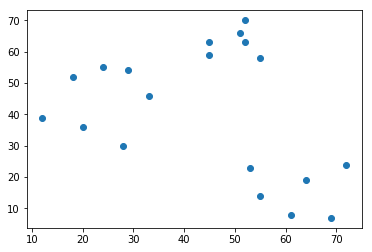

[[12 39]
 [20 36]
 [28 30]
 [18 52]
 [29 54]
 [33 46]
 [24 55]
 [45 59]
 [45 63]
 [52 70]
 [51 66]
 [52 63]
 [55 58]
 [53 23]
 [55 14]
 [61  8]
 [64 19]
 [69  7]
 [72 24]]
Centroids :  [[62.33333333 15.83333333]
 [35.69230769 53.15384615]]
Targets or labels :  [1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
[[62.33333333 15.83333333]
 [35.69230769 53.15384615]]
(2, 2)


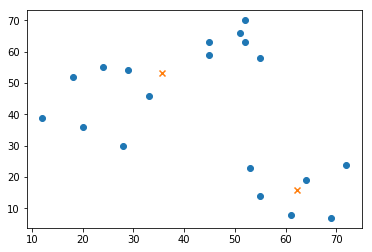

In [99]:
# Above dataset by kmeans
import matplotlib.pyplot as plt

x=[12,20,28,18,29,33,24,45,45,52,51,52,55,53,55,61,64,69,72]
y=[39,36,30,52,54,46,55,59,63,70,66,63,58,23,14,8,19,7,24]
plt.scatter(x,y)
plt.show()
import numpy as np
data=np.column_stack((x,y)) #produces a stack columnwise
print(data)
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3) #seperate data in 3 cluster
model.fit(data)  #we are fitting our data inside a model
model.predict(data)
#model.fit_predict(data) #combining above two steps in one step

#Locations of the means geerated by the KMeans
centroids=model.cluster_centers_
print("Centroids : ",centroids)
targets=model.labels_
print("Targets or labels : ",targets)
print(centroids)
print(centroids.shape)
#print(centroids[:,0])
#print(centroids[:,1])
plt.scatter(x,y)
plt.scatter(x=centroids[:,0],y=centroids[:,1],marker='x')
plt.show()

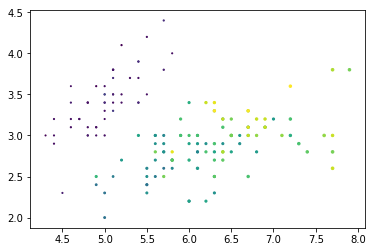

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

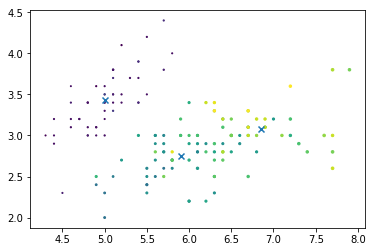

In [203]:
#IRIS DATA

import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_iris 
import random

iris=load_iris()
ir=pd.DataFrame(iris.data)
ir[4]=iris.target
#print(ir.head(100))
#ir.columns=ir.feature_names
x=ir.iloc[:,0].values #iloc retrieves data from dataframe
y=ir.iloc[:,1].values
z=ir.iloc[:,2].values #iloc retrieves data from dataframe
w=ir.iloc[:,3].values
plt.scatter(x,y,z,w)
plt.show()
import numpy as np
data=np.column_stack((x,y,z,w)) #produces a stack columnwise
print(data)
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3) #seperate data in 2 cluster
model.fit(data)  #we are fitting our data inside a model
model.predict(data)
#model.fit_predict(data) #combining above two steps in one step

#Locations of the means geerated by the KMeans
centroids=model.cluster_centers_
print("Centroids : ",centroids)
targets=model.labels_
print("Targets or labels : ",targets)
print(centroids)
print(centroids.shape)
#print(centroids[:,0])
#print(centroids[:,1])
plt.scatter(x,y,z,w)
plt.scatter(x=centroids[:,0],y=centroids[:,1],marker='x')
plt.show()

In [1]:
#DRIVER DATA

filename = "driver.txt"
mynumbers = []
count=0
x=list()
y=list()
with open(filename) as f:
    for line in f:
        if count!=0:
            mynumbers.append([float(n) for n in line.strip().split('\t')])
        count=1
    for pair in mynumbers:
        x.append(pair[1])
        y.append(pair[2])
        
#print(x)
#print(y)
plt.scatter(x,y)
plt.show()
import numpy as np
data=np.column_stack((x,y)) #produces a stack columnwise
print(data)
from sklearn.cluster import KMeans
model=KMeans(n_clusters=4) #seperate data in 2 cluster
model.fit(data)  #we are fitting our data inside a model
model.predict(data)
#model.fit_predict(data) #combining above two steps in one step

#Locations of the means geerated by the KMeans
centroids=model.cluster_centers_
print("Centroids : ",centroids)
targets=model.labels_
print("Targets or labels : ",targets)
print(centroids)
print(centroids.shape)
#print(centroids[:,0])
#print(centroids[:,1])
plt.scatter(x,y)
plt.scatter(x=centroids[:,0],y=centroids[:,1],marker='x')
plt.show()
    
        
        
    

NameError: name 'plt' is not defined